#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

#### Importing Data

In [2]:
# Load data
data = pd.read_csv("AAPL_data.csv")
# Select only the 'close' column
data = data[['close']]

#### Data Preprocessing

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [4]:
train_size = int(len(data_scaled) * 0.7)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size,
                          :], data_scaled[train_size:len(data_scaled), :]

In [5]:
train = scaler.inverse_transform(train)
test = scaler.inverse_transform(test)

#### ARIMA Model

In [6]:
# Adjust the order (p, d, q) based on your data
model = sm.tsa.ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

In [7]:
history = [x for x in train]
predictions = []

In [8]:
for t in range(len(test)):
    # Use the same order as the trained model
    model = sm.tsa.ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(test[t])

#### Evaluation

In [9]:
test_predict = np.array(predictions)
test_score = np.sqrt(mean_squared_error(test, test_predict))
print('Test RMSE: %.2f' % (test_score))

Test RMSE: 2.86


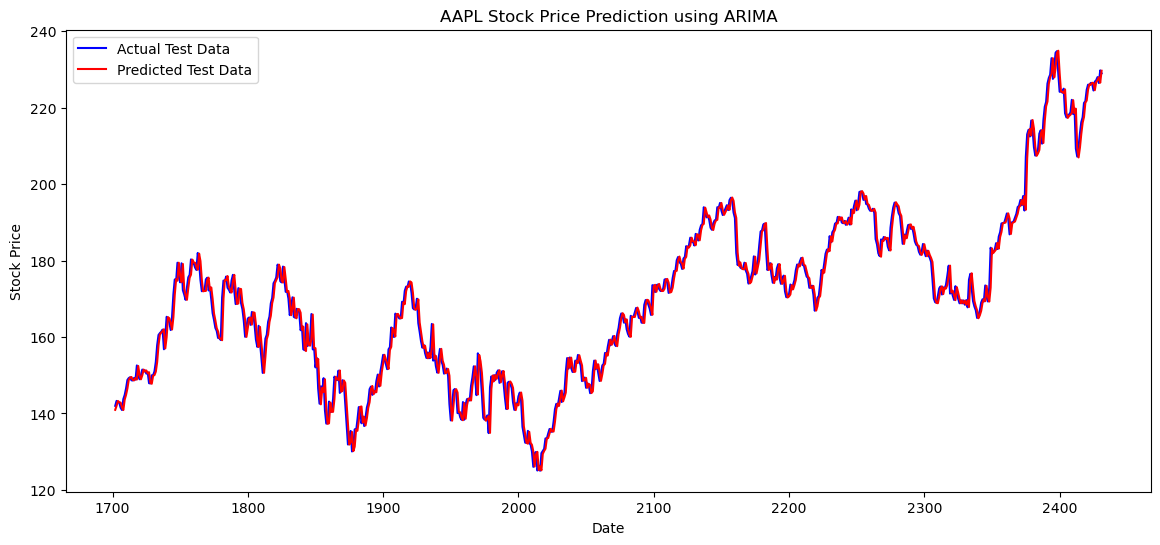

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(data.index[train_size:], test, color='blue', label='Actual Test Data')
plt.plot(data.index[train_size:], test_predict,
         color='red', label='Predicted Test Data')
plt.legend()
plt.title('AAPL Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

#### Results
    Test Results: 2.48